# Speed test with Python

In [5]:
# Libraries
!pip install matplotlib
!pip install speedtest-cli
!pip install pandas
!pip install pprint

# Basic Code 

In [109]:

import speedtest
import datetime
import pprint
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
with open('Speedtest.csv', 'w') as csv_file:
    headnames = ['time','download','upload','ping','isp','ip']
    keyboard = csv.DictWriter(csv_file, fieldnames=headnames)
    keyboard.writeheader()

In [111]:
bits_in_Megabits = 1048576 # 2^20
s = speedtest.Speedtest()
s.get_best_server()


{'url': 'http://187.190.241.18:8080/speedtest/upload.php',
 'lat': '20.6416',
 'lon': '-103.3161',
 'name': 'Tlaquepaque',
 'country': 'Mexico',
 'cc': 'MX',
 'sponsor': 'Totalplay',
 'id': '8880',
 'host': '187.190.241.18:8080',
 'd': 558.127632228536,
 'latency': 81.94}

# Cicle code

In [115]:

s.download()
s.upload()
res = s.results.dict()

with open('Speedtest.csv', 'a') as csv_file:
    keyboard = csv.writer(csv_file)
    

    time = datetime.datetime.now().strftime("%d/%m/%y %H:%M:%S")
    download = round(res["download"]/bits_in_Megabits,2)
    upload = round(res["upload"]/bits_in_Megabits,2)
    ping = round(res["ping"])
    isp = res["client"]["isp"]
    ip = res["client"]["ip"]

    keyboard.writerow([time,download,upload,ping,isp,ip])

In [113]:

pprint.pprint(res, width=1)

{'bytes_received': 90300781,
 'bytes_sent': 105619456,
 'client': {'country': 'MX',
            'ip': '189.143.152.117',
            'isp': 'Telmex',
            'ispdlavg': '0',
            'isprating': '3.7',
            'ispulavg': '0',
            'lat': '16.9573',
            'loggedin': '0',
            'lon': '-99.7143',
            'rating': '0'},
 'download': 72030847.85627565,
 'ping': 81.94,
 'server': {'cc': 'MX',
            'country': 'Mexico',
            'd': 558.127632228536,
            'host': '187.190.241.18:8080',
            'id': '8880',
            'lat': '20.6416',
            'latency': 81.94,
            'lon': '-103.3161',
            'name': 'Tlaquepaque',
            'sponsor': 'Totalplay',
            'url': 'http://187.190.241.18:8080/speedtest/upload.php'},
 'share': None,
 'timestamp': '2021-09-29T01:23:39.252262Z',
 'upload': 78842305.10041389}


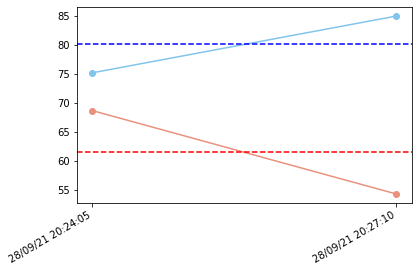

In [116]:


df = pd.read_csv('Speedtest.csv')



t = df['time']
down = df['download']
up = df['upload']
mean_download = df["download"].mean()
mean_upload = df["upload"].mean()

fig, ax = plt.subplots()

ax.plot_date(t, down, color='#EA917E', linestyle='-')
ax.plot_date(t, up, color='#81C4EC', linestyle='-')
ax.axhline(y=mean_download, color='r', linestyle='--')
ax.axhline(y=mean_upload, color='b', linestyle='--')

fig.autofmt_xdate()
plt.show()

